# Vader

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.utils import shuffle

import re

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline


In [4]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Afaf.Athar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:

df = pd.read_csv('hotel-reviews.csv')
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [7]:
df.drop_duplicates(subset ="Description", keep = "first", inplace = True)

In [8]:
df.shape

(38919, 5)

In [9]:
df['Description'] = df['Description'].astype('str')

In [10]:
#df.dropna()


In [11]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned = lambda x: text_clean(x)

In [12]:
# Let's take a look at the updated text
df['Description'] = pd.DataFrame(df.Description.apply(cleaned))
df.head(10)

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy
1,id10327,i stayed at the crown plaza april april th...,Internet Explorer,Mobile,not happy
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,we had rooms one was very nice and clearly ha...,InternetExplorer,Desktop,happy
6,id10332,my husband and i have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,my wife i stayed in this glorious city a whil...,Google Chrome,Mobile,happy
8,id10334,my boyfriend and i stayed at the fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,wonderful staff great location but it was defi...,Chrome,Tablet,not happy


In [13]:
df['scores'] = df['Description'].apply(lambda Description: sid.polarity_scores(Description))

df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,scores
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp..."
1,id10327,i stayed at the crown plaza april april th...,Internet Explorer,Mobile,not happy,"{'neg': 0.052, 'neu': 0.896, 'pos': 0.052, 'co..."
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,"{'neg': 0.049, 'neu': 0.867, 'pos': 0.084, 'co..."
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou..."
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,"{'neg': 0.042, 'neu': 0.87, 'pos': 0.088, 'com..."


In [14]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

#df.head()

In [15]:
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [16]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,scores,compound,sentiment_type
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.9565,POSITIVE
1,id10327,i stayed at the crown plaza april april th...,Internet Explorer,Mobile,not happy,"{'neg': 0.052, 'neu': 0.896, 'pos': 0.052, 'co...",-0.0498,NEGATIVE
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,"{'neg': 0.049, 'neu': 0.867, 'pos': 0.084, 'co...",0.9227,POSITIVE
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.9914,POSITIVE
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,"{'neg': 0.042, 'neu': 0.87, 'pos': 0.088, 'com...",0.9031,POSITIVE


In [17]:
df['sentiment_type'].value_counts()

POSITIVE    34603
NEGATIVE     4249
NEUTRAL        67
Name: sentiment_type, dtype: int64

<AxesSubplot:title={'center':'sentiment analysis'}>

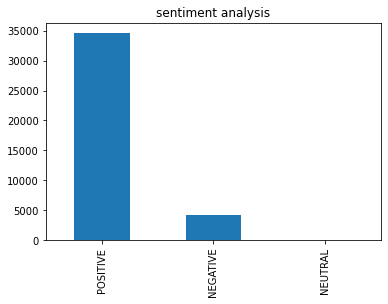

In [18]:
df.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

In [19]:
df[df['sentiment_type'] == 'NEGATIVE'].head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,scores,compound,sentiment_type
1,id10327,i stayed at the crown plaza april april th...,Internet Explorer,Mobile,not happy,"{'neg': 0.052, 'neu': 0.896, 'pos': 0.052, 'co...",-0.0498,NEGATIVE
20,id10346,having stayed at many hilton properties i expe...,Firefox,Mobile,not happy,"{'neg': 0.12, 'neu': 0.797, 'pos': 0.083, 'com...",-0.9560,NEGATIVE
25,id10351,we stayed at this hotel for two nights over th...,Opera,Mobile,not happy,"{'neg': 0.056, 'neu': 0.898, 'pos': 0.045, 'co...",-0.2837,NEGATIVE
39,id10365,i had a runaway this weekend to the ritz and w...,Edge,Desktop,not happy,"{'neg': 0.137, 'neu': 0.863, 'pos': 0.0, 'comp...",-0.6697,NEGATIVE
50,id10376,i agree not fancy but everything we needed bre...,Mozilla Firefox,Mobile,happy,"{'neg': 0.157, 'neu': 0.733, 'pos': 0.11, 'com...",-0.4189,NEGATIVE


In [20]:
df[df['sentiment_type'] == 'POSITIVE'].head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,scores,compound,sentiment_type
0,id10326,the room was kind of clean but had a very stro...,Edge,Mobile,not happy,"{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...",0.9565,POSITIVE
2,id10328,i booked this hotel through hotwire at the low...,Mozilla,Tablet,not happy,"{'neg': 0.049, 'neu': 0.867, 'pos': 0.084, 'co...",0.9227,POSITIVE
3,id10329,stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,"{'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compou...",0.9914,POSITIVE
4,id10330,my girlfriends and i stayed here to celebrate ...,Edge,Tablet,not happy,"{'neg': 0.042, 'neu': 0.87, 'pos': 0.088, 'com...",0.9031,POSITIVE
5,id10331,we had rooms one was very nice and clearly ha...,InternetExplorer,Desktop,happy,"{'neg': 0.044, 'neu': 0.791, 'pos': 0.165, 'co...",0.9472,POSITIVE


In [21]:
df[df['sentiment_type'] == 'NEUTRAL'].head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,scores,compound,sentiment_type
659,id10985,one month after i checked out and paid in full...,Mozilla,Desktop,not happy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
787,id11113,us for a room with double beds internet acces...,Edge,Mobile,not happy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
1160,id11486,the radisson lexington cashes in on its locati...,Google Chrome,Desktop,not happy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
1304,id11630,only minutes walk from the white house minute...,Firefox,Tablet,happy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
1707,id12033,name,Firefox,Mobile,happy,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,NEUTRAL
